In [1]:
# from google.colab import drive
# drive.mount('/gdrive')

In [1]:
from fastai.vision import *
from datetime import datetime

import matplotlib.pyplot as plt

In [2]:
date = datetime.now().date()
time_now = datetime.now().time()
time = f"{time_now.hour}-{time_now.minute}-{time_now.second}"

In [3]:
'''
Severity Levels

0 - 'No_DR',
1 - 'Mild',
2 - 'Moderate',
3 - 'Severe',
4 - 'Proliferate_DR'
'''

classes = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']

In [4]:
path = Path('../input/gaussian_filtered_images/')
path.ls()

[WindowsPath('../input/gaussian_filtered_images/Mild'),
 WindowsPath('../input/gaussian_filtered_images/Moderate'),
 WindowsPath('../input/gaussian_filtered_images/No_DR'),
 WindowsPath('../input/gaussian_filtered_images/Proliferate_DR'),
 WindowsPath('../input/gaussian_filtered_images/Severe')]

In [5]:
# remove the images that we cannot open
# for c in classes:
#     print(c)
#     verify_images(path/c, delete=True, max_size=500)

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224, 
                                  num_workers=4, bs=16).normalize(imagenet_stats)

In [7]:
data.classes

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

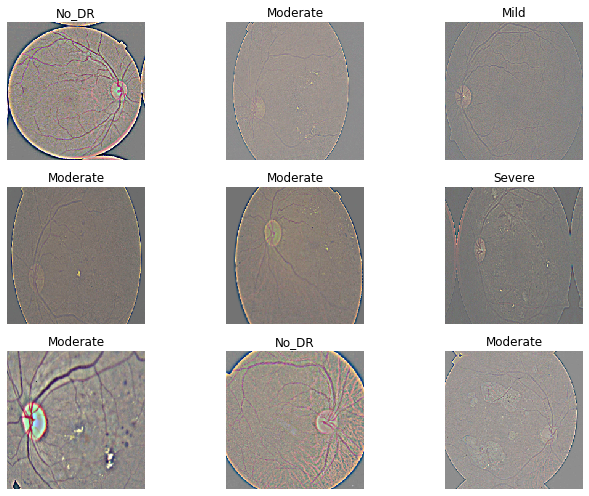

In [8]:
data.show_batch(rows=3, figsize=(10, 7))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe'], 5, 2930, 732)

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
# path = users/.cache/torch

In [11]:
learn.fit_one_cycle(20)    

epoch,train_loss,valid_loss,error_rate,time
0,1.408726,1.067374,0.356557,03:14
1,1.190752,1.017351,0.275956,03:11
2,1.071340,0.798553,0.286885,03:06
3,0.862903,0.732366,0.263661,03:02
4,0.811835,0.769868,0.259563,03:01
5,0.809910,0.743949,0.281421,03:01
6,0.760878,0.789106,0.295082,03:01
7,0.716106,0.705195,0.241803,03:01
8,0.678383,0.747028,0.262295,03:01
9,0.684480,0.633793,0.234973,03:01


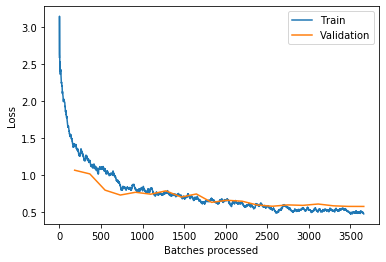

In [13]:
learn.recorder.plot_losses()
plt.savefig(f"../models/plots/{date}_{time}_loss_gaussian_stage1.png")
plt.show()

In [14]:
learn.save(f"../../../models/{date}_{time}_gaussian_stage_1")

In [15]:
learn.unfreeze()

In [16]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


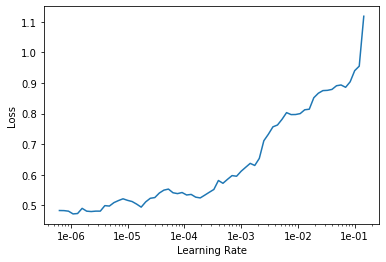

In [17]:
learn.recorder.plot()
plt.savefig(f"../models/plots/{date}_{time}_lrfind_loss_gaussian.png")
plt.show()

In [18]:
learn.fit_one_cycle(3, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.737364,0.635743,0.232240,04:27
1,0.621840,0.620948,0.221311,04:22
2,0.515837,0.535541,0.199454,04:22


In [19]:
learn.save(f"../../../models/{date}_{time}_gaussian_stage_2")

In [20]:
learn.load(f"../../../models/{date}_{time}_gaussian_stage_2")

Learner(data=ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Mild,Mild,Mild,Mild,Mild
Path: ..\input\gaussian_filtered_images;

Valid: LabelList (732 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
No_DR,Moderate,Moderate,Moderate,Moderate
Path: ..\input\gaussian_filtered_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

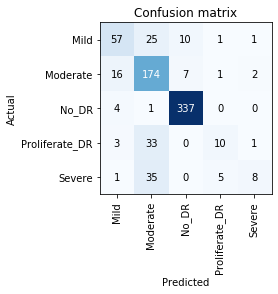

In [22]:
interp.plot_confusion_matrix()
plt.savefig(f"../models/plots/{date}_{time}_confusion_matrix_gaussian.png")

In [23]:
learn.export(f"{date}_{time}_gaussian.pkl")

In [ ]:
defaults.device = torch.device('cpu')

In [ ]:
img = open_image('../input/train_images/ffec9a18a3ce.png')
img

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class